<a href="https://colab.research.google.com/github/leej9233/palmer-penguin/blob/main/01_Palmer_Penguin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Top 23 Best Public Datasets for Practicing Machine Learning](https://rubikscode.net/2021/07/19/top-23-best-public-datasets-for-practicing-machine-learning/)</br>
[Scikit-learn Algorithm Cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)</br>
[Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)


## Setup & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Public Dataset Project/data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df = pd.DataFrame(df)

## Check the Data

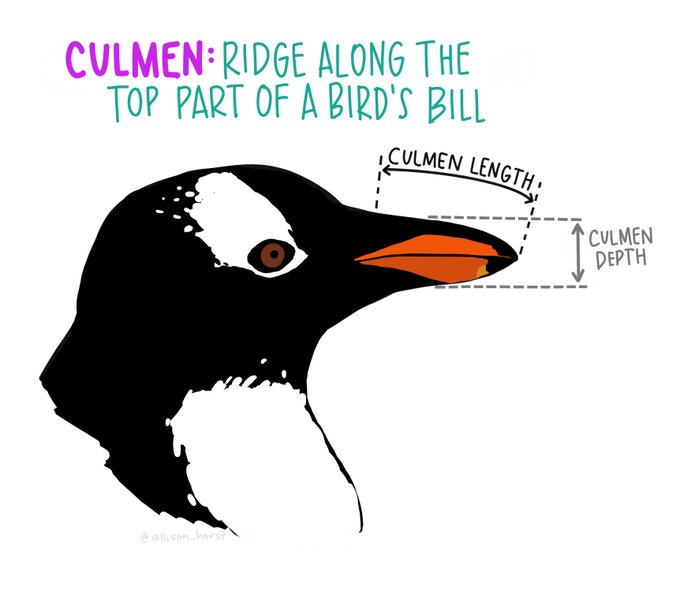

https://twitter.com/allison_horst/status/1270046411002753025

Feature Explanation
*   species: Penguin species (Chinstrap, Adelie, or Gentoo)
*   island: Island name (Dream, Torgersen, or Biscoe)
*   culmen_length_mm: Culmen length (mm)
*   culmen_depth_mm: Culmen depth (mm)
*   flipper_length_mm: Flipper legnth (mm)
*   body_mass_g: Body mass (g)
*   sex: Penguin sex

In [ ]:
# Check df for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Drop 'sex' column
df = df.drop('sex', axis=1)

In [ ]:
for index, row in df.iterrows():
    if row.isnull().any():
        df.drop(index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0


In [ ]:
# Check the remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


### Q: Does each island have each species of penguins?

In [ ]:
import plotly.express as px

fig = px.bar(
    df['species'].value_counts(),
    x=df['species'].value_counts().index,
    y=df['species'].value_counts().values,
    width=800,
    height=400
)

# Change X / Y Labels
fig.update_xaxes(title_text='Species')
fig.update_yaxes(title_text='Count')

# Change the title
fig.update_layout(title='Species Count')

fig.show()

Adelie: 146 / Gentoo: 119 / Chinstrap: 68

In [ ]:
fig = px.bar(
    df['island'].value_counts(),
    x=df['island'].value_counts().index,
    y=df['island'].value_counts().values,
    width=800,
    height=400
)

# Change X / Y Labels
fig.update_xaxes(title_text='Island Name')
fig.update_yaxes(title_text='Count')

# Change the title
fig.update_layout(title='Number of penguins in each island')

fig.show()

163 Biscoe / 123 Dream / 47 Torgersen

A: No. Penguins are mixed among these islands.

### Check how numerical features look against each other

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



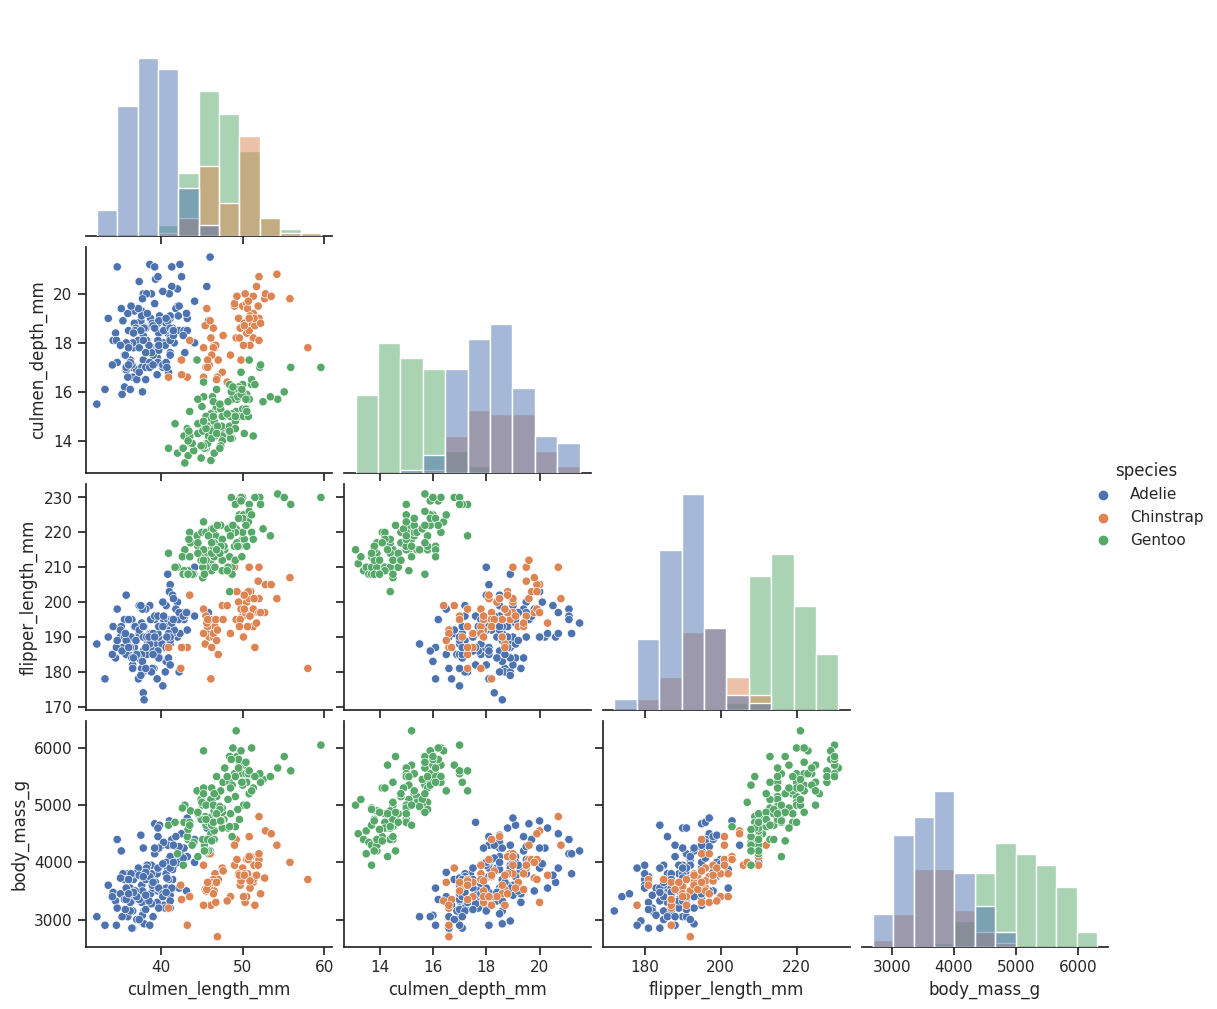

In [ ]:
import seaborn as sns

sns.set(style='ticks')
sns.pairplot(df, hue='species', height=3, size=4, diag_kind='hist', corner=True)

plt.gcf().set_size_inches(12,10)
plt.show()

## Label Encoding

In [ ]:
# Check categorical data (Dtype = object)
# print('Species: ', df['species'].unique())
# print('Island: ', df['island'].unique())
# print('Sex: ', df['sex'].unique())

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # le_species = LabelEncoder()
# le_island = LabelEncoder()
# le_sex = LabelEncoder()

# # df['species_encoded'] = le_species.fit_transform(df['species'])
# # df['island_encoded'] = le_island.fit_transform(df['island'])
# # df['sex_encoded'] = le_sex.fit_transform(df['sex'])

# print(df)

**Island**
*   Biscoe: 0
*   Dream: 1
*   Torgersen: 2

**Sex**
*   F: 0
*   M: 1

## OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_island = OneHotEncoder()

island_encoded = ohe_island.fit_transform(df[['island']])
island_feature_names = ohe_island.get_feature_names_out(['island'])
island_encoded_df = pd.DataFrame(island_encoded.toarray(), columns=island_feature_names)
df = pd.concat([df, island_encoded_df], axis=1)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


In [ ]:
# Drop 'Island' column
df = df.drop(['island'], axis = 1)

In [ ]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,Adelie,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,Adelie,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


In [ ]:
df['species'].replace({'Adelie' : 0,
                       'Chinstrap' : 1,
                       'Gentoo': 2}, inplace = True)

In [ ]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,0,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,0,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


### Pairplot with categorical features

In [ ]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,0,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,0,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


In [ ]:
column_mapping = {
    'culmen_length_mm': 'CulmenLen(mm)',
    'culmen_depth_mm': 'CulmenDepth(mm)',
    'flipper_length_mm': 'FlipperLen(mm)',
    'body_mass_g': 'BodyMass(g)',
    'species': 'Species',
}

df = df.rename(columns=column_mapping)

In [ ]:
df.head()

,Species,CulmenLen(mm),CulmenDepth(mm),FlipperLen(mm),BodyMass(g),island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,0,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,0,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


## Split the data

In [ ]:
# Separate X and y
X = df.loc[:, df.columns != 'SpeciesCode']
y = df['Species']

In [ ]:
X.head()

,Species,CulmenLen(mm),CulmenDepth(mm),FlipperLen(mm),BodyMass(g),island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,0,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,0,39.3,20.6,190.0,3650.0,0.0,0.0,1.0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Separate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Species,CulmenLen(mm),CulmenDepth(mm),FlipperLen(mm),BodyMass(g),island_Biscoe,island_Dream,island_Torgersen
15,0,38.7,19.0,195.0,3450.0,0.0,0.0,1.0
6,0,39.2,19.6,195.0,4675.0,0.0,0.0,1.0
307,2,47.5,14.0,212.0,4875.0,1.0,0.0,0.0
221,2,48.7,14.1,210.0,4450.0,1.0,0.0,0.0
93,0,36.2,17.3,187.0,3300.0,0.0,1.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 15 to 102
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           229 non-null    int64  
 1   CulmenLen(mm)     229 non-null    float64
 2   CulmenDepth(mm)   229 non-null    float64
 3   FlipperLen(mm)    229 non-null    float64
 4   BodyMass(g)       229 non-null    float64
 5   island_Biscoe     229 non-null    float64
 6   island_Dream      229 non-null    float64
 7   island_Torgersen  229 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.1 KB


## Logistic Regression

In [ ]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
# Predict the y value with X_test dataset
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

1.0

## Linear SVC

From scikit-learn algorithm cheat-sheet
1.   More than 50 samples
2.   Predict a category
3.   Labeled Data
4.   Less than 100k samples : Linear SVC

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# lin_svc = make_pipeline(StandardScaler(),
#                         LinearSVC(C=1, random_state=42))

In [ ]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(lin_svc, X_train, y_train, cv=5)

In [ ]:
# lin_svc.fit(X_train, y_train)

In [ ]:
# y_pred = lin_svc.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score

# test_accuracy = accuracy_score(y_test, y_pred)
# test_accuracy

## K-mean Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



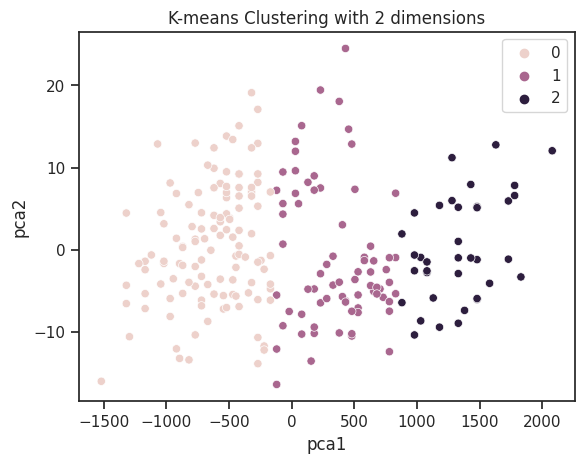

In [ ]:
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_train)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=pred_y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

penguin_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
penguin_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = penguin_clf.predict(X_test)

In [ ]:
penguin_clf.score(X_test, y_pred)

1.0

In [ ]:
penguin_clf.score(X_test, y_test)

1.0